# Autocorrelation and Partial Autocorrelation of PSP Data

In [1]:
# First we need to import the necessary libraries. 
# Pyspedas handles loading the data, while MFDFA handles fluctuation function calculation
import pyspedas
import matplotlib.pyplot as plt
import numpy as np
from pytplot import tplot
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
import MFDFAlib

31-Mar-25 23:04:59: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2021/
31-Mar-25 23:05:00: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042806_v02.cdf
31-Mar-25 23:05:00: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042812_v02.cdf
31-Mar-25 23:05:07: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2021/
31-Mar-25 23:05:08: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042806_v02.cdf
31-Mar-25 23:05:08: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042812_v02.cdf
31-Mar-25 23:05:24: /home/scoscia/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(



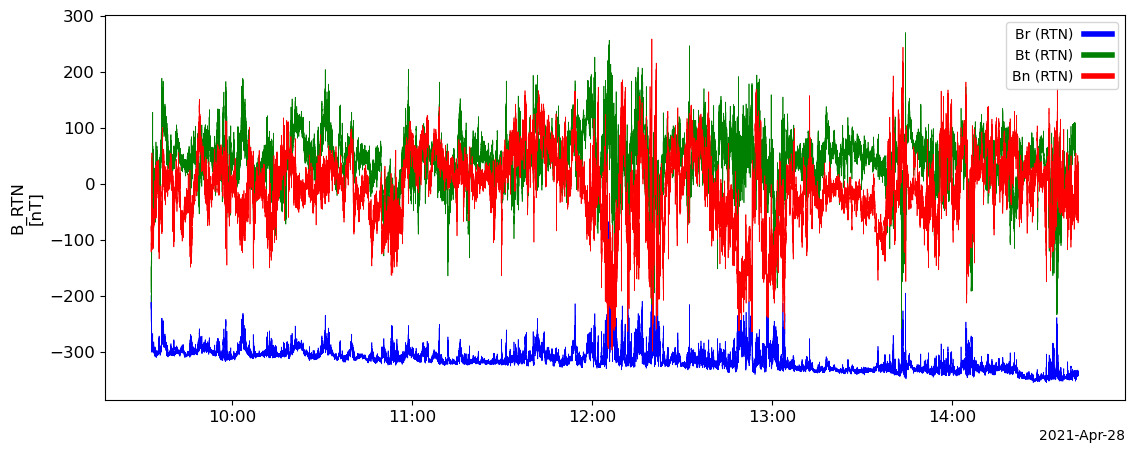

31-Mar-25 23:05:25: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2021/
31-Mar-25 23:05:26: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042800_v02.cdf
31-Mar-25 23:05:26: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042806_v02.cdf
31-Mar-25 23:05:33: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2021/
31-Mar-25 23:05:33: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042800_v02.cdf
31-Mar-25 23:05:34: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042806_v02.cdf


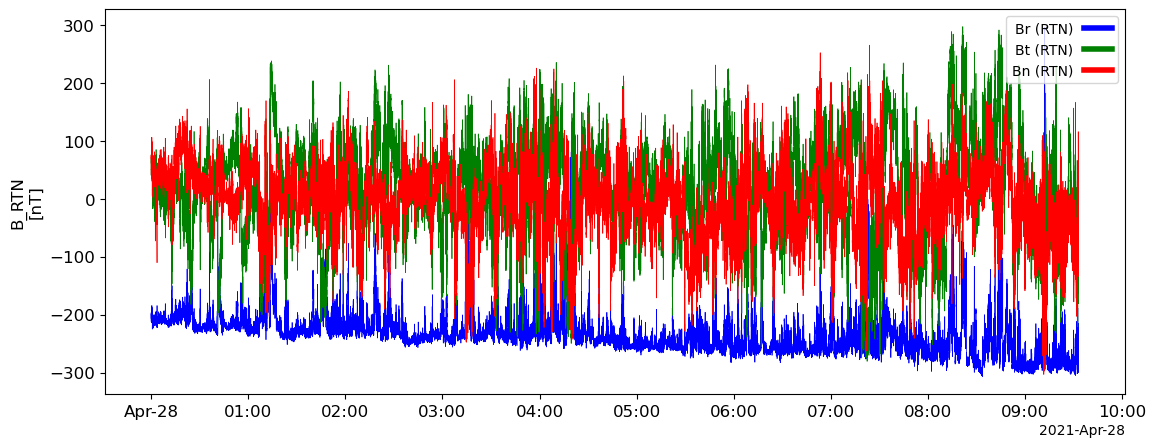

In [2]:
# First let's load the sub-Alfvenic time range
# Ranges taken from https://arxiv.org/pdf/2201.10718 Section 3
subAlfTimeRange = ['2021-4-28/09:33','2021-4-28/14:42']

# Here we set the environment variable for the specified time range of the PSP data:
fields_vars = pyspedas.projects.psp.fields(trange=subAlfTimeRange, datatype='mag_rtn', level='l2', time_clip=True)

# Here we extract the RTN coordinate B-field data for PSP:
b_rtn_subAlf = pyspedas.get_data("psp_fld_l2_mag_RTN")

# Here we calculate the magnitude of the B-field data: 
bmag_sub = MFDFAlib.magnitude(b_rtn_subAlf.y)

# Here we plot the data to make sure everything looks proper
tplot('psp_fld_l2_mag_RTN')

# Finally, we perform the multifractal analysis using the MFDFA library:
# This will give us the Renyi spectrum, Hurst spectrum, fluctuation function, and singularity spectrum
# MFDFA = MFDFAlib.MFDFA_analysis(bmag_sub)

# Now let's choose the corresponding super-Alfvenic time range
superAlfTimeRange = ['2021-4-28/00:00','2021-4-28/09:33']

# Here we set the environment variable for the specified time range of the PSP data:
fields_vars = pyspedas.projects.psp.fields(trange=superAlfTimeRange, datatype='mag_rtn', level='l2', time_clip=True)

# Here we extract the RTN coordinate B-field data for PSP:
b_rtn_superAlf = pyspedas.get_data("psp_fld_l2_mag_RTN")

# Here we calculate the magnitude of the B-field data: 
bmag_super = MFDFAlib.magnitude(b_rtn_superAlf.y)

# Here we plot the data to make sure everything looks proper
tplot('psp_fld_l2_mag_RTN')

sub_label = 'Sub-Alfvenic Interval (April 28th, 2021 from 09:33-14:42 UTC)'
super_label = 'Super-Alfvenic Interval (April 28th, 2021 from 00:00-09:33 UTC)'

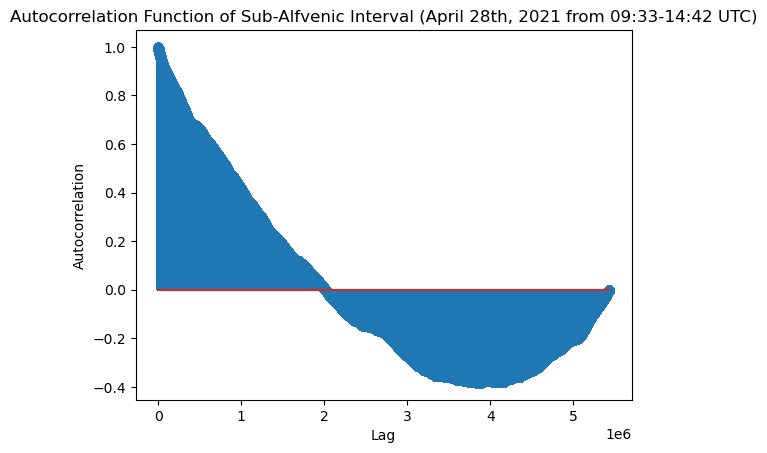

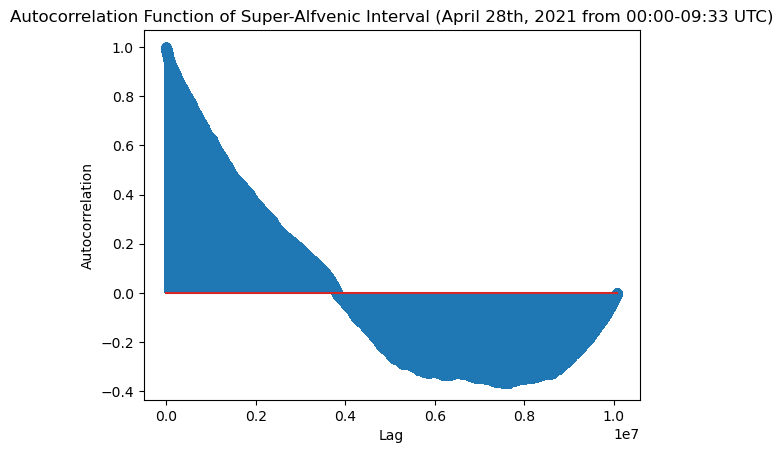

In [ ]:
# Calculate the autocorrelation function using statsmodels library
acf_sub = sm.tsa.acf(bmag_sub, nlags = len(bmag_sub))
plt.stem(range(len(acf_sub)), acf_sub)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function of Sub-Alfvenic Interval (April 28th, 2021 from 09:33-14:42 UTC)")
plt.show()

acf_super = sm.tsa.acf(bmag_super, nlags = len(bmag_super))
plt.stem(range(len(acf_super)), acf_super)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function of Super-Alfvenic Interval (April 28th, 2021 from 00:00-09:33 UTC)")
plt.show()

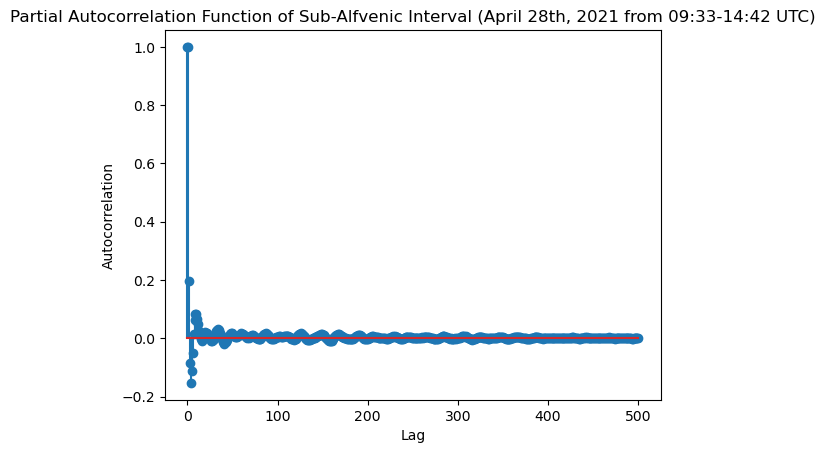

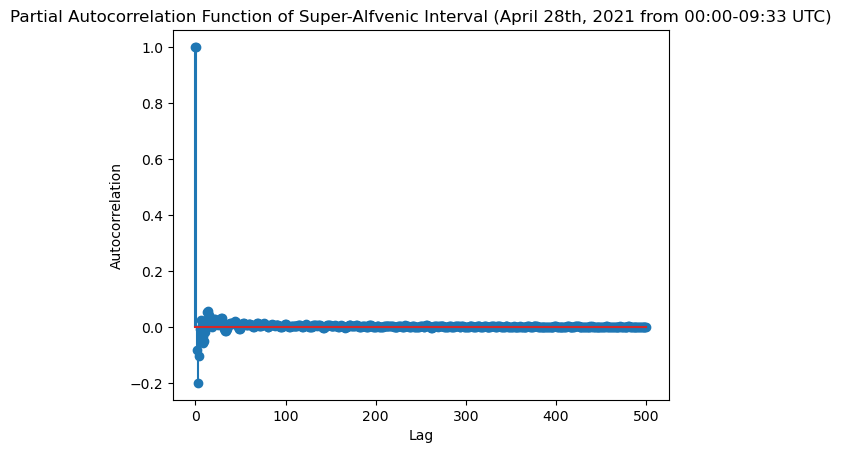

In [19]:
# Calculate the partial autocorrelation function using statsmodels library
nlags = 500
pacf_sub = sm.tsa.pacf(bmag_sub, nlags = nlags)
plt.stem(range(nlags+1), pacf_sub)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Partial Autocorrelation Function of Sub-Alfvenic Interval (April 28th, 2021 from 09:33-14:42 UTC)")
plt.show()

pacf_super = sm.tsa.pacf(bmag_super, nlags = nlags)
plt.stem(range(nlags+1), pacf_super)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Partial Autocorrelation Function of Super-Alfvenic Interval (April 28th, 2021 from 00:00-09:33 UTC)")
plt.show()

## Differenced Time Series

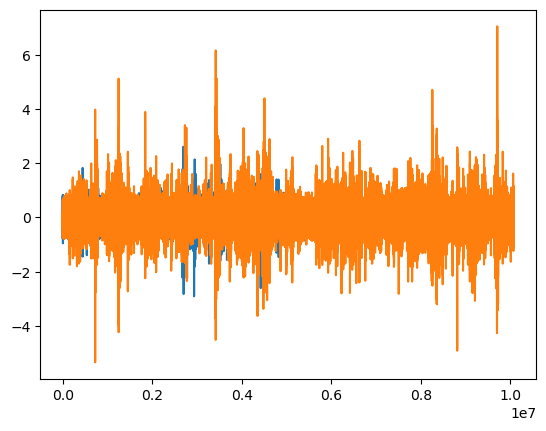

In [3]:
# Difference the time series to make it more stationary:
diff_sub = MFDFAlib.difference(bmag_sub)

plt.plot(diff_sub)

# Difference the time series to make it more stationary:
diff_super = MFDFAlib.difference(bmag_super)

plt.plot(diff_super)

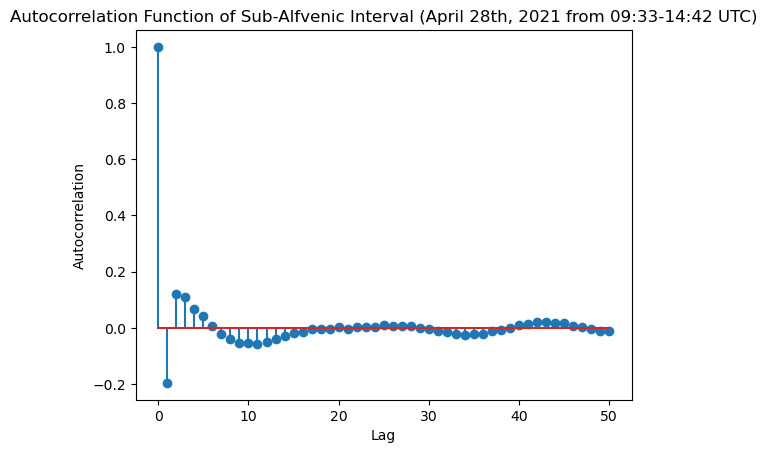

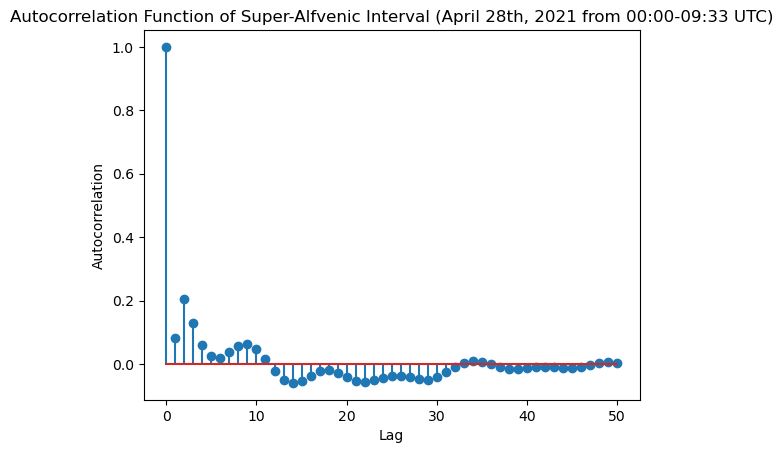

In [4]:
# Calculate the differenced autocorrelation function using statsmodels library
diff_acf_sub = sm.tsa.acf(diff_sub, nlags = 50)
plt.stem(range(len(diff_acf_sub)), diff_acf_sub)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function of Sub-Alfvenic Interval (April 28th, 2021 from 09:33-14:42 UTC)")
plt.show()

diff_acf_super = sm.tsa.acf(diff_super, nlags = 50)
plt.stem(range(len(diff_acf_super)), diff_acf_super)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function of Super-Alfvenic Interval (April 28th, 2021 from 00:00-09:33 UTC)")
plt.show()

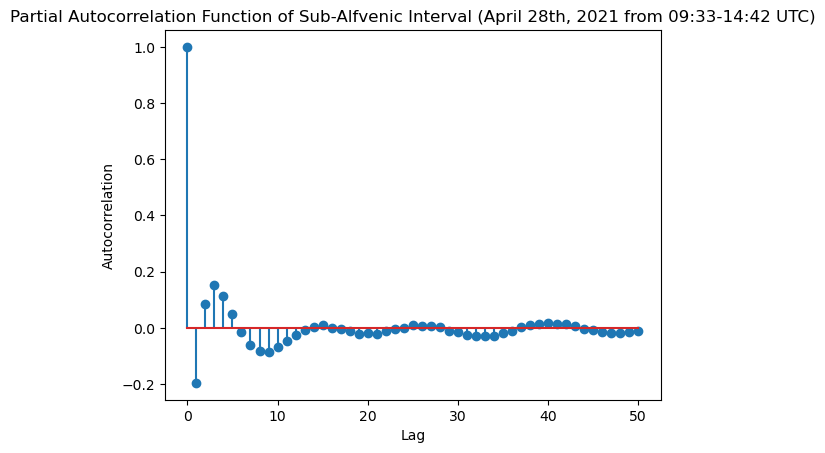

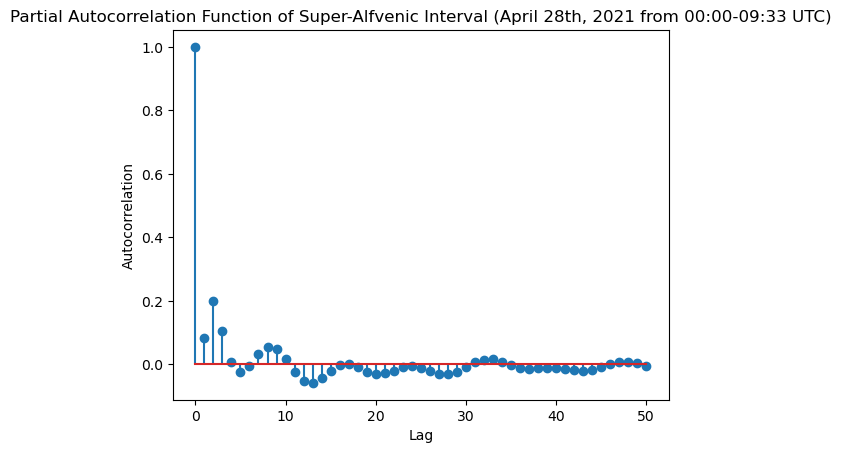

In [5]:
# Calculate the differenced partial autocorrelation function using statsmodels library
nlags = 50
diff_pacf_sub = sm.tsa.pacf(diff_sub, nlags = nlags)
plt.stem(range(nlags+1), diff_pacf_sub)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Partial Autocorrelation Function of Sub-Alfvenic Interval (April 28th, 2021 from 09:33-14:42 UTC)")
plt.show()

diff_pacf_super = sm.tsa.pacf(diff_super, nlags = nlags)
plt.stem(range(nlags+1), diff_pacf_super)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Partial Autocorrelation Function of Super-Alfvenic Interval (April 28th, 2021 from 00:00-09:33 UTC)")
plt.show()